# Exploration Regression Exercises:

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from math import sqrt
from scipy import stats

import env
from wrangle import wrangle_zillow
import prepare


### Exercise 1) 
As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.


In [2]:
df = wrangle_zillow()

In [3]:
#double-checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094570 entries, 0 to 2094569
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             int64  
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
 7   county                        object 
dtypes: float64(2), int64(5), object(1)
memory usage: 143.8+ MB


In [4]:
#double checking any nulls not caught
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
county                          0
dtype: int64

In [5]:
#looking at the count of each column variable
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")

bedroomcnt
3    955905
4    621073
2    332537
5    138253
1     22723
6     19800
0      4279
Name: bedroomcnt, dtype: int64
-----------------
bathroomcnt
2.00    940252
3.00    416450
1.00    412087
2.50    142178
4.00     74212
1.50     31112
3.50     26777
5.00     20923
4.50     16820
6.00      5412
0.00      4180
5.50      4151
0.50        13
1.75         3
Name: bathroomcnt, dtype: int64
-----------------
calculatedfinishedsquarefeet
1200    5182
1080    4372
1120    4350
1400    3822
1440    3681
        ... 
54         1
8262       1
6444       1
7864       1
7026       1
Name: calculatedfinishedsquarefeet, Length: 7143, dtype: int64
-----------------
taxvaluedollarcnt
450000     820
500000     772
400000     722
430000     689
440000     682
          ... 
122086       1
231332       1
1131381      1
999493       1
536061       1
Name: taxvaluedollarcnt, Length: 557429, dtype: int64
-----------------
yearbuilt
1955    83828
1950    70957
1954    68596
1953    61834
1956    61

bedroomcnt


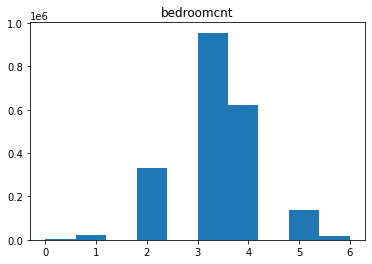

bathroomcnt


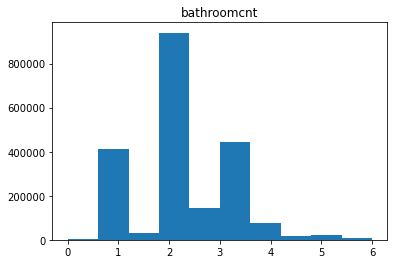

calculatedfinishedsquarefeet


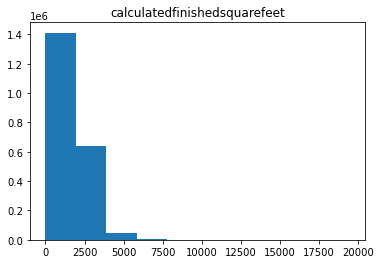

taxvaluedollarcnt


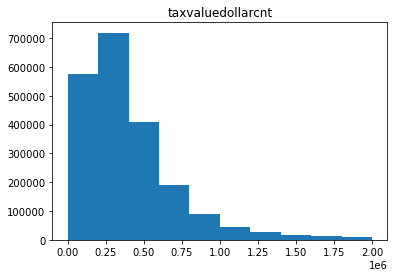

yearbuilt


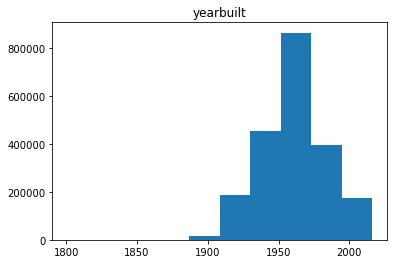

taxamount


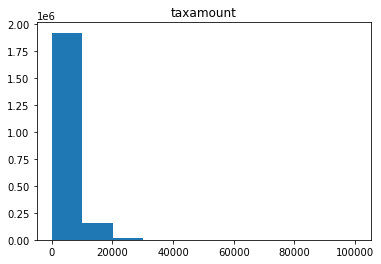

fips


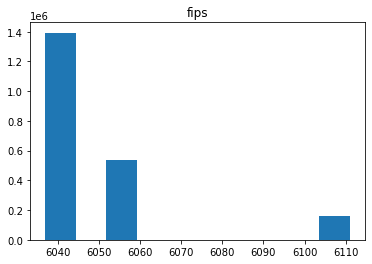

county


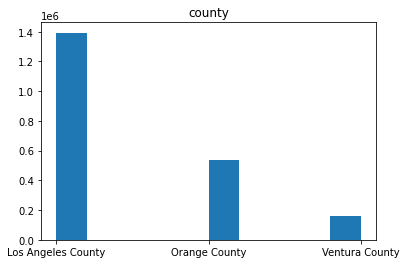

In [6]:
#Univariate plots: (Histograms of each column variable)
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.grid(False)
    plt.show()

In [7]:
#looking at means and std of numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2094570.0,3.270298,0.890559,0.00,3.00,3.00,4.0000,6.00
bathroomcnt,2094570.0,2.181947,0.875977,0.00,2.00,2.00,3.0000,6.00
calculatedfinishedsquarefeet,2094570.0,1796.820984,787.712298,1.00,1250.00,1607.00,2159.0000,19460.00
taxvaluedollarcnt,2094570.0,398619.663857,313505.297081,22.00,185937.00,322168.00,516761.0000,1999995.00
yearbuilt,2094570.0,1960.662379,21.863654,1801.00,1949.00,1958.00,1975.0000,2016.00
taxamount,2094570.0,4909.452668,3639.363826,6.34,2506.64,4040.14,6210.6275,100379.34
fips,2094570.0,6048.373624,20.432690,6037.00,6037.00,6037.00,6059.0000,6111.00


### Takeaways:
- Noticing that the mean of our main components (bedroom count, bathroom count and value) are:
    * <b>3bd 2ba | house value= $398,619 | 1796 sqft</b>

- Fips is 3 counties that can be broken down into either their own (maybe own models?) and I'd like to explore the means of those seperately


In [8]:
#using a function to set the Fips codes into their different counties.
def clearing_fips(df):
    '''This function takes in a DataFrame of unprepared Zillow information and generates a new
    'county' column, with the county name based on the FIPS code. 
    '''
    # create a list of our conditions
    fips = [
        (df['fips'] == 6037),
        (df['fips'] == 6059),
        (df['fips'] == 6111)
        ]
    # create a list of the values we want to assign for each condition
    counties = ['Los Angeles County', 'Orange County', 'Ventura County']
    # create a new column and use np.select to assign values to it using our lists as arguments
    df['county'] = np.select(fips, counties)
    return df

In [9]:
#using the new function:
clearing_fips(df)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,county
0,4,2.0,3633,296425,2005,6941.39,6037,Los Angeles County
1,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles County
2,3,2.0,2077,646760,1926,7924.68,6037,Los Angeles County
3,0,0.0,1200,5328,1972,91.60,6037,Los Angeles County
4,0,0.0,171,6920,1973,255.17,6037,Los Angeles County
...,...,...,...,...,...,...,...,...
2094565,4,4.0,4375,422400,2015,13877.56,6037,Los Angeles County
2094566,4,3.0,2262,960756,2015,13494.52,6059,Orange County
2094567,4,4.5,3127,536061,2014,6244.16,6059,Orange County
2094568,3,2.5,1974,424353,2015,5302.70,6059,Orange County


In [10]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,county
0,4,2.0,3633,296425,2005,6941.39,6037,Los Angeles County
1,3,4.0,1620,847770,2011,10244.94,6037,Los Angeles County
2,3,2.0,2077,646760,1926,7924.68,6037,Los Angeles County
3,0,0.0,1200,5328,1972,91.60,6037,Los Angeles County
4,0,0.0,171,6920,1973,255.17,6037,Los Angeles County


### Exercise 2) Make sure to perform a train, validate, test split 
before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

### Splitting the Data:

In [11]:
#using function found in wrangle.py file
train, validate, test = prepare.split_data(df)

train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,county
584465,3,3.0,1558,548235,1992,6239.72,6059,Orange County
191552,3,2.0,1764,719944,1941,8660.63,6037,Los Angeles County
868542,3,2.0,1368,573616,1964,5857.00,6059,Orange County
1459105,2,2.0,1155,576041,1950,7484.74,6037,Los Angeles County
417535,2,1.0,903,181259,1921,2289.50,6059,Orange County
...,...,...,...,...,...,...,...,...
143897,3,1.5,1198,51782,1954,831.44,6059,Orange County
1194932,4,2.5,2017,250604,1979,3239.92,6111,Ventura County
1706472,4,2.5,2503,428686,1990,4285.88,6059,Orange County
1092256,4,2.0,1390,303030,1956,3864.59,6037,Los Angeles County


### Univariate Plots:
Looking at the variables from a visual lens.

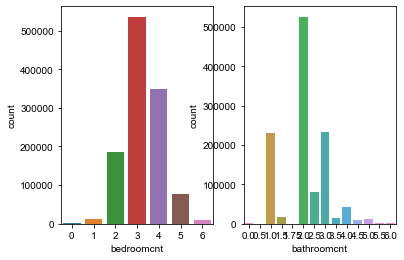

In [12]:
#Looking at discrete values of Bedroom count and Bathroom count
fig, ax =plt.subplots(1,2)
sns.countplot(train['bedroomcnt'], ax=ax[0])
sns.countplot(train['bathroomcnt'], ax=ax[1])
sns.set(rc = {'figure.figsize':(12,8)})
fig.show()

#### TAKEAWAYS: I felt that these visualizations showed the mean values well of both bathroom count & bedroom count
- Bathroom Count: making it anything above 0.5 baths and under 5.5 baths. 
- Bedroom Count: taking out the 0 bedroom data

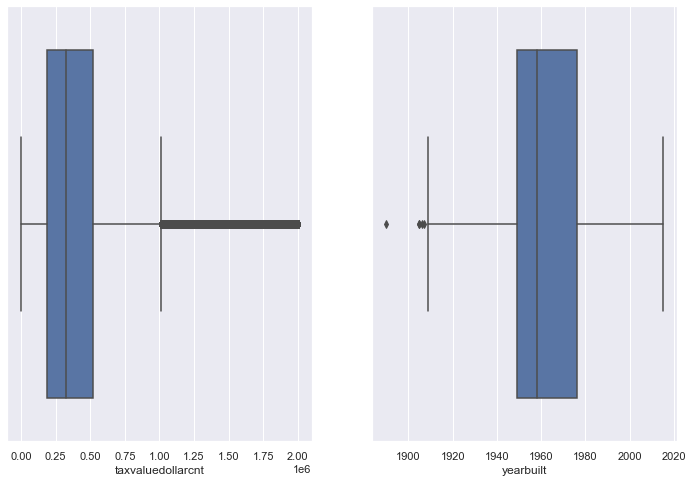

In [13]:
#Looking at continous values of year built
fig, ax =plt.subplots(1,2)
sns.boxplot(x=train["taxvaluedollarcnt"], ax=ax[0])
sns.boxplot(train.sample(1000)['yearbuilt'], ax=ax[1])
sns.set(rc = {'figure.figsize':(12,8)})
fig.show()

#NOTE: will be treating year built as continous, so I can try running a correlation on yearbuilt 

### Exercise 3)
Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

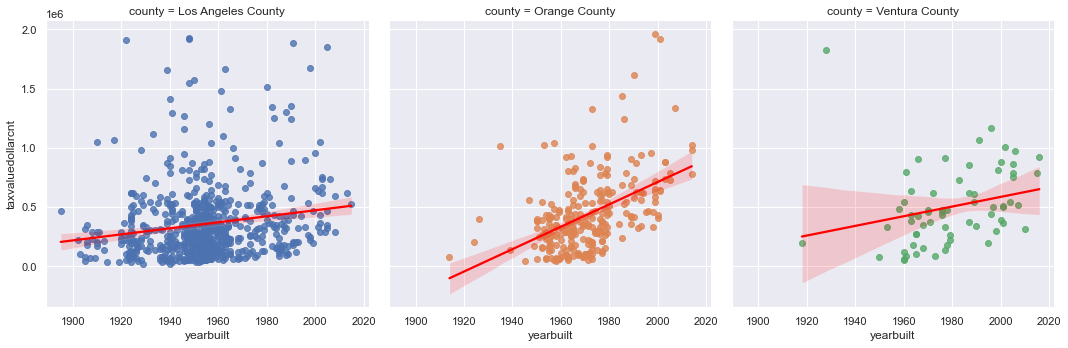

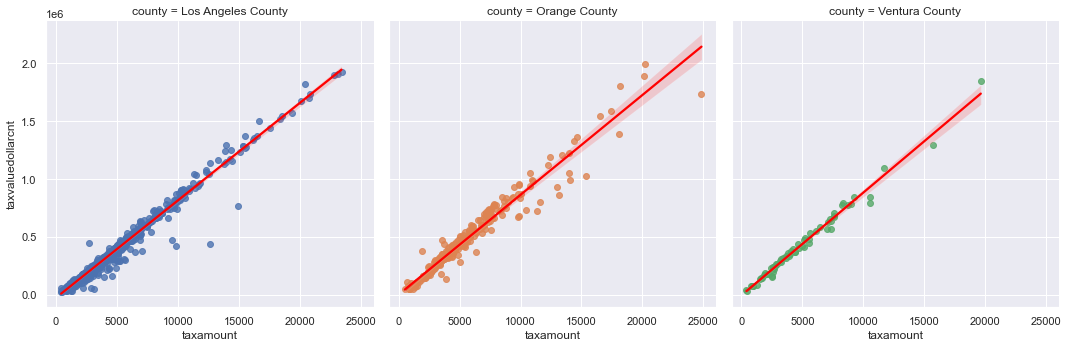

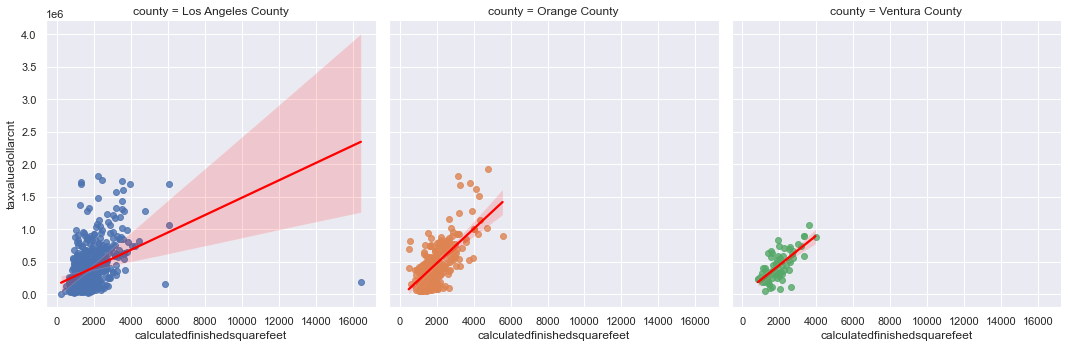

In [15]:
def plot_variable_pairs():
    columns = ['yearbuilt','taxamount','calculatedfinishedsquarefeet']
    for col in columns:
        sns.lmplot(x= col, y="taxvaluedollarcnt", data=train.sample(1000), col = 'county', hue = 'county', line_kws={'color': 'red'})
        
plot_variable_pairs()

### Exercise 4)
Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

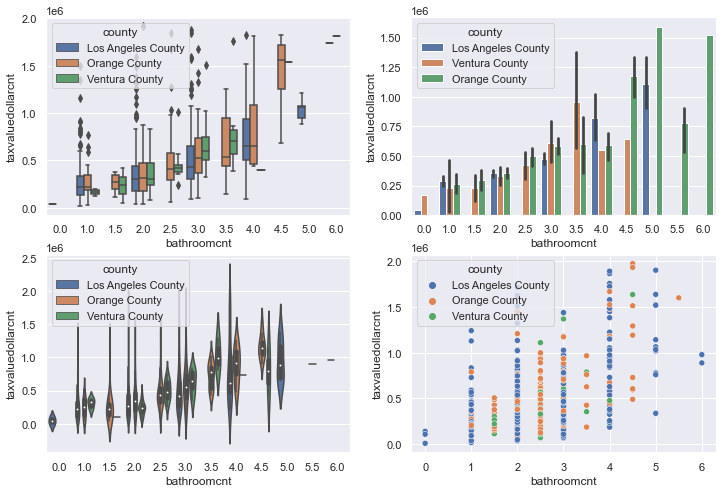

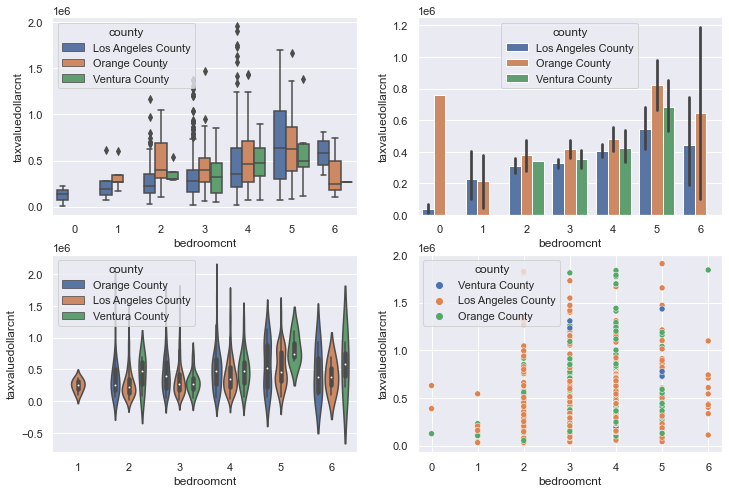

In [16]:
def plot_categorical_and_continuous_vars():
    columns = ['bathroomcnt','bedroomcnt']
    for x in columns:
        sns.set()
        fig, axes = plt.subplots(2,2)
        sns.boxplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'county', ax = axes[0,0])
        sns.barplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'county', ax = axes[0,1])
        sns.violinplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'county', ax = axes[1,0])
        sns.scatterplot(x= x, y="taxvaluedollarcnt", data=train.sample(1000), hue = 'county', ax = axes[1,1])
plot_categorical_and_continuous_vars()
    

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

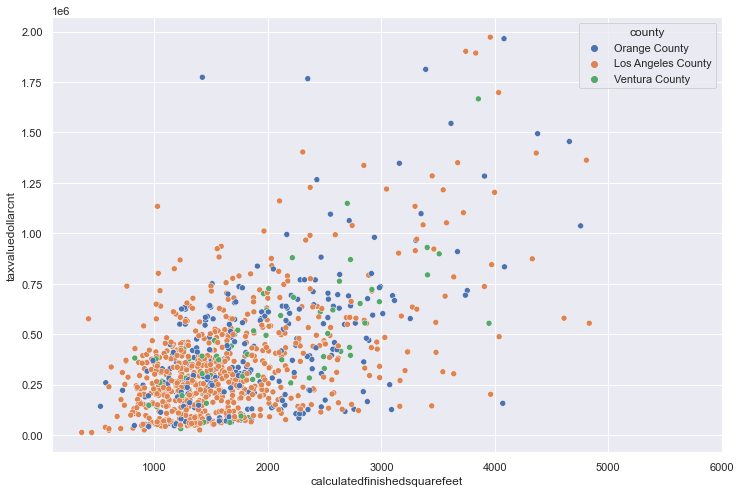

In [17]:
#looking at calculated finished squarefeet (taking in 6,000sqft as the below chart shows that the majority of sold homes
#are lying within this range...will check via statistics too)
plt.xlim(100,6000)
sns.scatterplot(x= 'calculatedfinishedsquarefeet', y="taxvaluedollarcnt", data=train.sample(1000), hue = 'county')

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

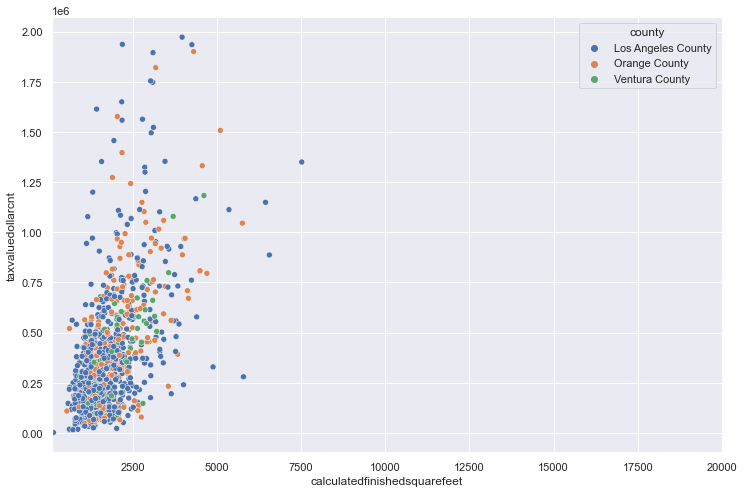

In [18]:
#just to show the comparisions and 'why' of narrowing down to 6000sqft
plt.xlim(100,20000)
sns.scatterplot(x= 'calculatedfinishedsquarefeet', y="taxvaluedollarcnt", data=train.sample(1000), hue = 'county')

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

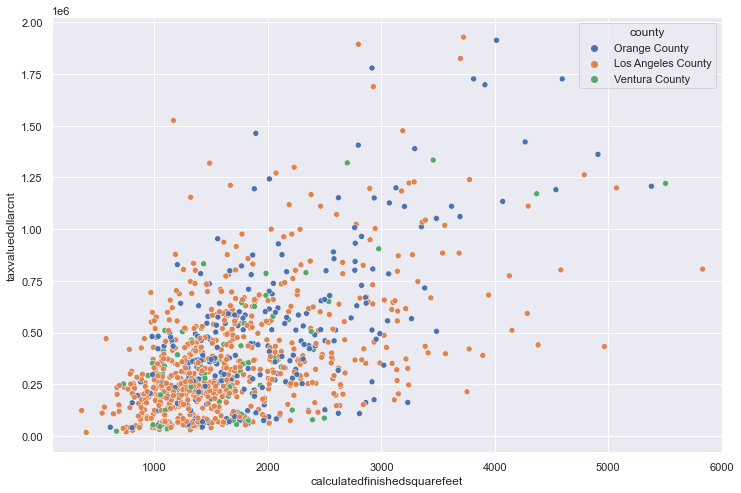

In [19]:
#looking at calculated finished squarefeet (taking in 6,000sqft as the below chart shows that the majority of sold homes
#are lying within this range...will check via statistics too)
plt.xlim(100,6000)
sns.scatterplot(x= 'calculatedfinishedsquarefeet', y="taxvaluedollarcnt", data=train.sample(1000), hue = "county")

In [20]:
#wanting to just check on how many homes were sold in each county
train.value_counts('county')

county
Los Angeles County    780308
Orange County         302233
Ventura County         90418
dtype: int64

### Exercise 5):
Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

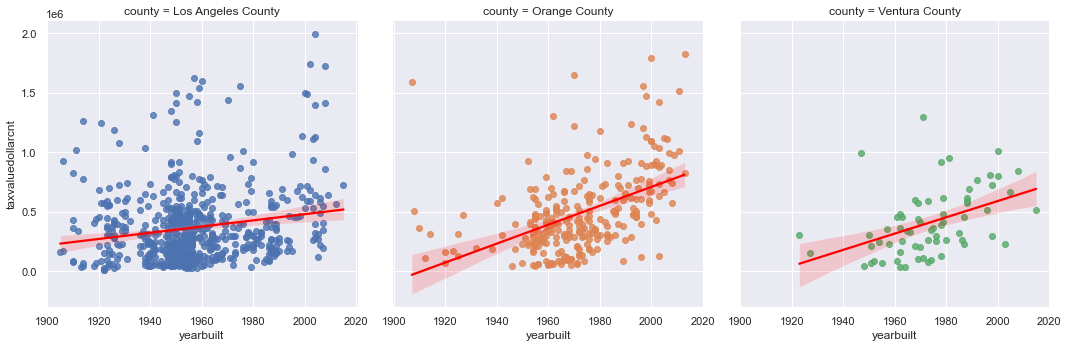

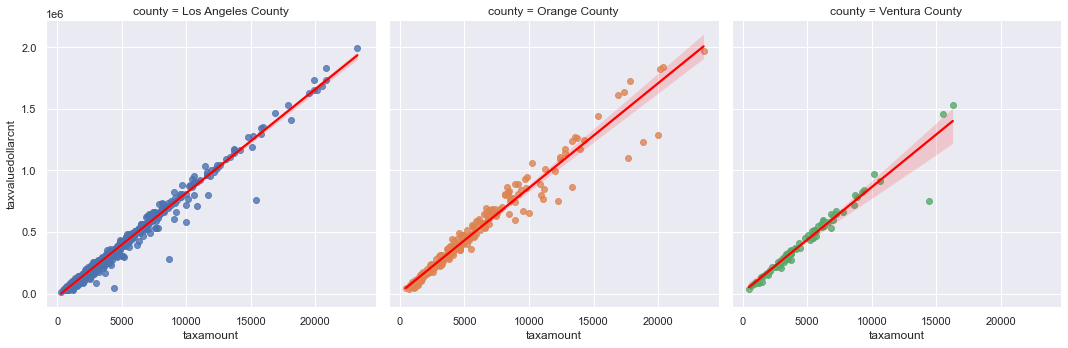

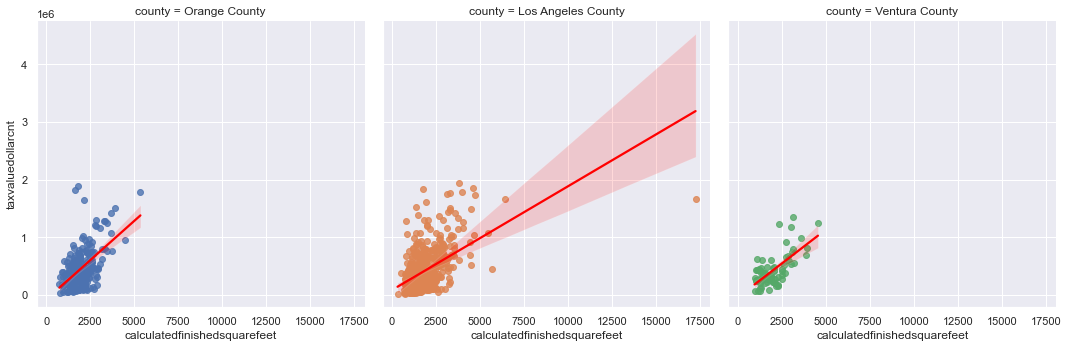

In [21]:
#redo of Exercise 4)
#importing function to pair plot continous variables, by county
import explore

plot_variable_pairs()


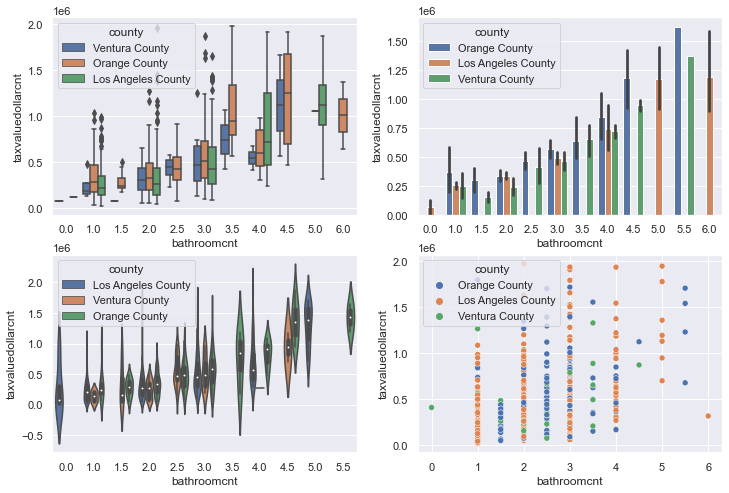

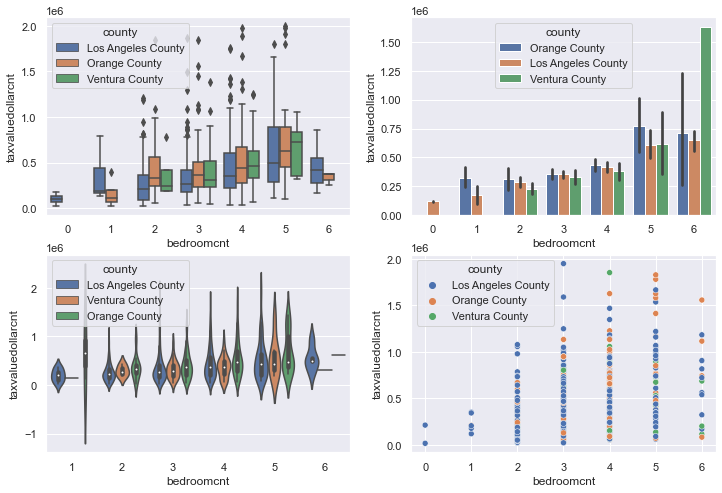

In [22]:
#importing function to cat plot the categorical variables to target, with hue as county
plot_categorical_and_continuous_vars()


### Exercise 6):
Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

#### TAKEAWAYS:
- The value of a home does seem to rise based on bathroom count.
- There is visual evidence of the value of home relating to bedroom count (but surprisingly not as obvious as bathroom)

<b>So, there is a possibility that a home would have more value if it added another bathroom instead of a bedroom???

<AxesSubplot:xlabel='county', ylabel='taxvaluedollarcnt'>

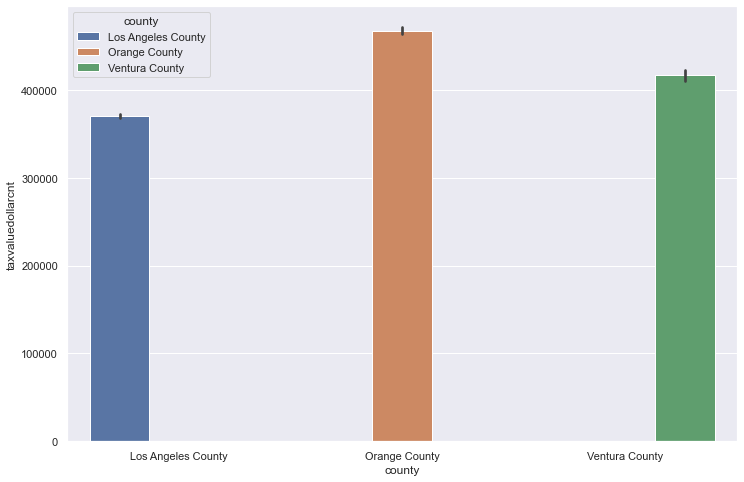

In [23]:
#Let's look at relationship to home value based on county the home is in: (sample size: 100,000 homes)
sns.set_color_codes("pastel")
sns.barplot(x="county", y="taxvaluedollarcnt", data=train.sample(100000), hue="county")

#### OVERALL TAKEAWAYS ON CHARTS (by county):

<u>Orange County:
- If a home is located within Orange County, it has the probability of having a higher home value
- If the home has 4.5-5.5 bathrooms, its home value increases
- If the home has 5 bedrooms (no more, no less), the home value increases

<u>Los Angeles County:
- The most Single Family properties were sold in LA county
- LA county overall has the lowest housing tax values
- The more bedroom and bathrooms a property has, the more the tax value will increase (5 bath/ 5bed best threshold)
    
<u>Ventura County:
- Second highest valued homes per county
- 4-5 bedroom homes are valued highest in this county (before and after, value decreases)
- 3.5 bathroom homes are valued highest in this county (before and after, value decreases)

__________________________________________________________________


## Planning Ahead:
- Seperating tests between counties.

- Hypothesis tests on:
    - Bathroom/Bedroom count vs Home value
    - Squarefeet vs Home value
    - Yearbuilt vs Home value
    
- Evaluate and Test Models.

- Next Steps: 
    * Average incomes vs Average homes sold
    * Developing Unique Homes model predictions 
    

__________________________________________________________________

In [26]:
#looking at each county's averages and stats
train[train.county == 'Orange County'].describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,302233.0,3.469065,0.847982,0.00,3.00,3.00,4.00,6.00
bathroomcnt,302233.0,2.392965,0.778003,0.00,2.00,2.00,3.00,6.00
calculatedfinishedsquarefeet,302233.0,1987.371670,801.502430,190.00,1401.00,1809.00,2406.00,14848.00
taxvaluedollarcnt,302233.0,466822.243385,328950.830686,2733.00,241217.00,398441.00,614213.00,1999908.00
yearbuilt,302233.0,1971.553235,17.821898,1875.00,1959.00,1969.00,1984.00,2015.00
taxamount,302233.0,5430.611147,3776.651802,18.72,2892.78,4605.44,6946.98,43922.04
fips,302233.0,6059.000000,0.000000,6059.00,6059.00,6059.00,6059.00,6059.00


In [27]:
train[train.county == 'Los Angeles County'].describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,780308.0,3.160622,0.892545,0.00,3.0000,3.000,4.0000,6.00
bathroomcnt,780308.0,2.080487,0.902806,0.00,1.0000,2.000,3.0000,6.00
calculatedfinishedsquarefeet,780308.0,1703.088905,763.269676,2.00,1190.0000,1521.000,2016.0000,19460.00
taxvaluedollarcnt,780308.0,369997.757478,306861.836723,22.00,168333.0000,289626.000,468874.0000,1999900.00
yearbuilt,780308.0,1954.943556,21.428446,1801.00,1944.0000,1953.000,1964.0000,2016.00
taxamount,780308.0,4723.147726,3617.022640,13.36,2367.1275,3814.175,5903.3675,67715.45
fips,780308.0,6037.000000,0.000000,6037.00,6037.0000,6037.000,6037.0000,6037.00


In [28]:
train[train.county == 'Ventura County'].describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,90418.0,3.553761,0.820275,0.00,3.00,4.00,4.00,6.00
bathroomcnt,90418.0,2.359055,0.792450,0.00,2.00,2.00,3.00,6.00
calculatedfinishedsquarefeet,90418.0,1979.481143,814.938507,102.00,1407.00,1803.00,2369.00,15129.00
taxvaluedollarcnt,90418.0,419401.618704,279601.538603,4544.00,234068.25,369991.00,540970.00,1999000.00
yearbuilt,90418.0,1973.816452,17.978323,1880.00,1962.00,1973.00,1987.00,2016.00
taxamount,90418.0,4802.442747,3155.547617,16.48,2728.52,4241.16,6133.55,35466.42
fips,90418.0,6111.000000,0.000000,6111.00,6111.00,6111.00,6111.00,6111.00


In [51]:
#creating objects to create subsets of the counties
Orange_county= train[train.county=='Orange County']
LA_county=train[train.county=='Los Angeles County']
Ventura_county=train[train.county=='Ventura County']

### Exercise 7):
Come up with some initial hypotheses based on your goal of predicting property value.


<i><b>Q: Does Bathroom count increase a homes value?
    (and can I create a test per county too?)

#### Overall bathroom count to home value hypothesis test
- a = 0.05
- H0: Bathroom count does not relate to home value
- Ha: Bathroom count does relate to home value

In [46]:
#correlation testing for all county's bathroomcnt overall
from math import sqrt
from scipy import stats

n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

x = train.bathroomcnt
y = train.taxvaluedollarcnt

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
print('The correlation coefficient is:', r_xy)



The correlation coefficient is: 0.5110014525433888


In [47]:
#calculating corresponding p-value:
# 1 step: t-statistic
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

643.8385177665537

In [48]:
# 2 step: find p value:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

0.0

In [49]:
# 3 step: compare p value to our alpha:

p < α


True

### We reject the null hypothesis and see that there IS a linear correlation between number of bathrooms and home value.

________________________________________________________________

<i><b>Q: Does Bedroom count increase a homes value?
    (and can I create a test per county too?)

#### Overall bedroom count to home value hypothesis test
- a = 0.05
- H0: Bathroom count does not relate to home value
- Ha: Bathroom count does relate to home value

In [54]:
#correlation testing for all county's bathroomcnt overall
from math import sqrt
from scipy import stats

n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

x = train.bedroomcnt
y = train.taxvaluedollarcnt

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
print('The correlation coefficient is:', r_xy)



The correlation coefficient is: 0.2756779415836234


In [55]:
#calculating corresponding p-value:
# 1 step: t-statistic
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

310.6037425674922

In [56]:
# 2 step: find p value:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

0.0

In [57]:
# 3 step: compare p value to our alpha:

p < α


True

### We reject the null hypothesis and see that there IS a linear correlation between number of bedrooms and home value.

__________________________________________________________________